# PCA From Scratch

## Goal of this Paper

The goal is to try to gain a strong intuition behind PCA, including the math.  There have been many papers published on this same subject.  But intuition is not something that is one size fits all.  Oftentimes, you have to read many articles on a subject before you find one that matches your way of thinking, level of detail desired and types of examples you can relate to.  Most of the time, we end up combining multiple articles to build the background knowledge and understanding of a subject that we feel comfortable with.  So having one more paper on PCS intuition is not necessarily redundant.

## Approach

We will use a simple dataset with only two variables.  This is a bit ironic in that the main reason we use PCA is for feature reduction of datasets with tens or hundreds of variables.  But this simple dataset will be much easier to understand and be able to more clearly see the math and to visualize the results.  

We will generate the dataset with a correlation between the 2 variables.  This is done since PCA is primarily a way to transform datasets with dependent variables into datasets with independent variables. The reduction in features is done after this transformation and is based on removing the transformed features with the least amount of variability.

The approach will be to describe the math concepts, then build the Python code that executes this math on our simple dataset.  We will then use SKLearn's library to validate that our “from scratch” code gets the same results.




## Motivation for Studying PCA

From a data science perspective, we would ideally like to have as much data as possible before we start building our models.  Getting more data mainly comes from either collecting more observations, adding more features, or a combination of both.  But one is not necessarily a substitute for the other.  More observations gives a better representation of the population and reduces errors by having a wider distribution of data.  More features gives us more things to look at for the predictions, hopefully "converting" noise into structured features.  The errors are reduced by having less irreducible errors.  In other words, new features might explain variances not seen with less features.

Gathering more observations (rows of data) could entail things like taking more samples, enrolling more people into your study, or sampling for longer periods of time.  Depending on the type of observations, there might be limits on how much data can be practically gathered, especially if the data is labeled.

Adding more features (columns of data) is sometimes easier to do.  Instead of just getting the temperature and humidity, why not include barometric pressure, UV index and wind speed.  Oftentimes if there are measurements available, we try to include all these measurements in our dataset for our prediction model to use.

One of the problems with adding a lot of features, is that very often these features are not independent of each other.  A good example of this might be a person's income and the price they paid for their car.  If I am building a dataset to predict if a person will buy a yacht, I would want to look at their income.  If a person only makes $30,000 a year, the chances of that person buying a yacht is much lower than a person who makes 1 million a year.  If I add the feature of the price of the last automobile purchase, it might not help the prediction that much.  i.e. The two people above will most likely buy very different priced cars aligned with their income.  So the second feature is not telling us much more than the first feature.  This is not to say that the cost of their last car is not important.  A third person with zero income who just bought a 2 million dollar Bugatti might have a very good chance of buying a yacht.

Another problem with a lot of features is the curse of dimensionality.  The more features we add, the greater the chance that  observations have unique patterns of features.  Let's assume that all our features are Gaussian distributed and are independent of each other (a very unlikely scenario).  The probability that an observation will have a value for a feature that is within 1 standard deviation of the mean is 68.27%.  The probability an observation will be within 1 SD of the mean on 2 features is $0.6827 * 0.6827 \approx 0.46$.  If we have 20 Gaussian independent features, the probability of an observation being in the "middle" of all 20 of these features is $0.6827^{20} \approx 0.00048$.  

What this means is that with larger numbers of features, most of the data points will be tucked into the corners of the feature hypercubes.  For those familiar with electronics, this is similar to the skin effect with high voltage transmission lines.  The electrons repel each other, so all the electrons in a high voltage cable try to push themselves away from each other as much as possible and end up being forced onto the surface or the skin of the wire.  Most of the copper in the wire is not used because of this.  Since most of the models we rely on use some type of distance between points, this "skin effect" becomes a problem.  The data points are all on the walls of these hypercubes.  With high dimensions, these hypercubes form more of a sphere shape with a radius of $r$.  This means that the distance between the mean and all these data points are almost all about the same value, very close to $r$.

If we combine the dependency problem and the curse of dimensionality, we find datasets with very large numbers features are either redundant due to dependency, or forced to the edges of the feature hypercubes.  But this does not mean that all these features are not helpful.  

Two of the biggest problems in data science are:
- Overfitting on irreducible errors (noise)
- Training time and/or stalled learning with large numbers of dimensions (and observations)

More features might be able to explain some of the noise and therefore reduce overfitting.  But more features increase the complexity of training and might prevent completion of training in a reasonable amount of time.  PCA is a way of reducing the number of features by understanding dependency between features.  But care must be taken to only reduce features when training is compromised.



# Feature Reduction

But if we have to remove features, which ones should we remove?  One of the most obvious ways to reduce the features is to remove features that have a high correlation to other features.  If 10 features are mostly just linear transformations of each other, can't we just use 1 and discard the other 9?

The answer is yes and no.  In our yacht example above, the cost of the person's car is highly correlated to the person's income.  But we also saw that some people may not have an income and still be very wealthy.  

A good example of correlated features are height and weight.  We would expect someone 6 foot 8 inches tall to weigh more than someone 5 foot 1 inch.  But weight varies for other reasons other than just height, e.g. obesity, cancer or weight lifting.  If we are accessing the risks of a medical condition where being over or under weight is important, a height adjusted weight might be an extremely valuable feature for our model.  Remember, variance in features is critical for making accurate predictions!

Two features that have some kind of dependency does not mean they are 100% correlated.  Throwing away any of these features would throw away some variance that can be very helpful in our predictions.  Ideally, we would want to somehow transform these 2 dependent features into 2 features independent of each other, each with their own independent variance.  If after this transformation, some transformed features have little variance, they can be removed without losing much of the variance of the dataset. 

But this transformation must be done in a way that does not alter the meaning of the original dataset.  Non-altering transformations are nothing new in data science.  We often center and scale features and do things like one-hot encoding.  This changes the data, but does not alter the meaning of the data or the relationship between data points.




## Vector Spaces and Bases

If we look at a vector space in $R^2$, say height and weight. Every person in the dataset would produce one vector (or tuple).  The vector would be $(height, weight)$.  We have 2 axes X and Y which correspond to height and weight respectively.  Let's make the units be cm for height and kg for weight.  Let's take a person that is 172cm tall might weigh 74kg.  So the vector for this person would be:

$\begin{pmatrix}172 \\ 74 \end{pmatrix}$

This vector makes a single point in our vector space.  But this point assumes a basis of $(height, weight)$.  

This will look very odd, but we could represent that same point with a different basis $(height, 2 \times weight)$.  With this weird basis, the same point (or vector) would have to be changed since the weight basis is scaled differently (each tick equals 2kg):

$\begin{pmatrix}172 \\ 37 \end{pmatrix}$

This did not change the data, it just changed the way we built the data point or vector.

Now let's try something that is even odder, $(height, height \times weight)$.  Here, the second axis is the value of weight times height.  To get the weight, you would have to take the value of the second axis and divide by the value of the first axis the height.  This gives us a new vector:

$\begin{pmatrix}172 \\ 12728 \end{pmatrix}$

What is the height and weight of this person?  The height is simple, 172cm.  The weight = $12728 \div 172 = 74kg$.

To our normal way of thinking, this is very inefficent and looks like a dumb approach.  But you can still extract the same data from these new axes and the data in the original dataset is unchanged.

In fact, you can create any kind of crazy bases for the vector space as long as each basis is linearly independent from each other.  The linear independence ensures you are not throwing any data away and that data in each of the original bases is preserved.  The bases do not have to be orthogonal to each other as long as they are linearly independent.  That being said, having orthogonal bases is much nice to work with and much more intuitive.


## Rotation

We looked at different ways of looking at the same data points in a vector space by changing the bases of the space.  But we did not look at how or why we would want to change the bases.  

If you look at a scatter plot between 2 variables, you will most likely see a data cloud of some sort of shape.  This shape depends on the distribution of each variable, the variance and covariance.  For two distributions that tend to have most values closer to the mean (Gausian like), the data cloud looks concentrated in the middle of the two variables.  

If the two variables are completely independent of each other, the data cloud has either a not discernable shape, has a round shape or is flattened.  The flattening is most likely from one of the variables having a larger variance then the other.  But since these the two variables are independent, the orientation of the flattened cloud is aligned with one or the other axis.

If the two variables are some dependent or linear relationship, the cloud may be flattened, but in a direction that is diagonal of both the axes.  This angle shows the linear regression slope of the correlation between the two variables.

![alt text](https://s3.amazonaws.com/acadgildsite/wordpress_images/Data+Science/Correlation+%2C+Covariance/image4.png "Data Clouds") 

In summary, data clouds that appear flattened, but aligned with or of the 2 axes shows independence of the 2 variables.  Data clouds that appear flattened, but the flattening is diagonal, shows a dependence between the two variables.


What if we rotate the data cloud for 2 dependent variables until the flatting is aligned to the x-axis?  

![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQzKm-oHRFUN11LAsp4AGHH93TMDFSSbGIMrH6GOmePmSoOwMHt&usqp=CAU "Data Cloud with Independent Variables") 

This rotation can be achieved by changing the bases of the vector space.  As we saw above, this does not change the data, but just looks at the same data from a different perspective.

For example, what would happen if we rotate the height and weight data cloud:

![alt text](https://online.stat.psu.edu/stat200/sites/stat200/files/inline-images/weight_height_regression_0.png "Height/Weight") 

The new bases used in the rotation would no longer reflect height and weight.  The 2 new bases would **both** have influences from **both** height and weight.  Because of this, these new bases cannot be referred to as height and weight.  In fact, these 2 new bases would not have any meaningful names.  But they would remove the dependence between the two new "variables".  If you calculate the Pearson's correlation coefficient of this new data cloud, it would show a value very close to zero, not correlation.

The 2 new bases would each have their own independent variance, with each of these variance potentially contributing to the prediction.  If the 2 variables were highly correlated, the variance in one of the 2 new bases would be almost zero and therefore probably not contribute much to the prediction.  But with variables like height and weight, one of the new variance could be described as height independant weight.  The variance could be critical to accessing health risks.

But how do we know how much to rotate the data cloud and how do we do the rotation?

Let's answer the second question first.  Chances are, the rotation is not going to be exactly $45^{\circ}$, but let’s start with an exact rotation of $45^{\circ}$ to avoid the math for now.

It turns out that a $45^{\circ}$ rotation can be achieved with the following change in bases: $(Y, -X)$.  So our original bases are $(height, weight)$ and the rotation bases would be $(weight, -1 \times height)$.  This would make a vector for a person 172cm tall and weight 74kg be:

$\begin{pmatrix}74 \\ -172 \end{pmatrix}$


Here we might be able to name these new bases, weight and negative height.  But most of the time, the correlation between 2 dependent variables will involve components of both of the origional bases.  So let's avoid giving the new rotated bases names can call them Princaple Components for now, i.e. PC1 and PC2.


So we have some idea of how to rotate our data to remove dependence between variables or features, but we still have to figure out how much we should rotate the data cloud.

To do this, we need to look back at linear regression.  One of the core tasks we do as data scientists is to determine the slope and y-intercept between two variables.  This typically involves changing the slope and bias until we achieve the lowest possible squared difference between the actual values and the line $y = mx + b$.

To make things simpler, let's center our data so that the means of both variables equals zero.  i.e. subtract the mean from each data point.

This should eliminate the need for a y-intercept leaving only the slope of the regression line to calculate.  The slope is now the best fit for how the data cloud is oriented with the original bases of the dataset.  In other words, this slope describes the amount of rotation the data cloud has to the original bases and is therefore the amount or rotation we need to remove this correlation.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

from sklearn.decomposition import PCA

### We will stay with $R^2$ for now

This is mainly to be able to easily visualize the scatter plots.

But this mean that we might be avoiding complexities of higher orders (i.e. Right=hand and Left-hand rules).

## Build a data cloud with some degree or corrlation between X and Y

Slope: 8.9872
Y-Intercept: 69.3527


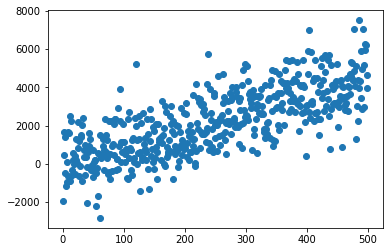

In [2]:
max_x = 500
slope_range = [.1, 10]
slope_direction = np.random.choice([-1,1])
intercept_range = [-80, 80]
residual_var = 100
x = np.arange(max_x)
m = np.random.uniform(*slope_range) * slope_direction
b = np.random.uniform(*intercept_range)
y_variation_factor = 1.3
y = m * x + b + np.random.normal(0, residual_var, len(x)) * m * y_variation_factor
print(f'Slope: {m:.4f}\nY-Intercept: {b:.4f}')
plt.scatter(x, y)

### We want to center the two features, but not change their scale

We will be using the covariance and not the corrlation for out Eigendecomposition.  This will preserve the magnature of the variances for each feature

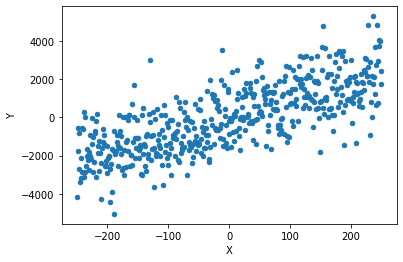

In [3]:
df = pd.DataFrame({'X':x, 'Y':y})
df.X = (df.X - df.X.mean()) #/ df.X.std()
df.Y = (df.Y - df.Y.mean()) #/ df.Y.std()
df.plot.scatter('X', 'Y')

#### We can simply divide each feature by it's standard deviation to standarize the dataset if we wanted

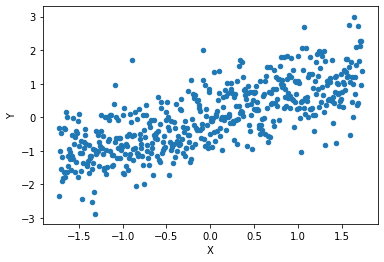

In [4]:
df_std = df.copy()
df_std.X = df_std.X / df_std.X.std()
df_std.Y = df_std.Y / df_std.Y.std()
df_std.plot.scatter('X', 'Y')

### We want to use covariance, but let's quickly look at the correlation first

Note that the correlation of our centered dataframe is the same as the covariance of our standardized dataframe.

The non-diagonal values are equal to the Pearson correlation coefficient.  i.e. how much linear correlation there is between 2 variables.  A value of 1 means $Y = X$.  A value of 0 means there is no correlation between the 2 factors.

Here, the random approach will give a Pearson value of around 75%, so there should be a strong linear relationship between X and Y, but not perfect.


In [5]:
display(df.corr()) # corr() returns Pearson corrlation coefficent automatically.
display(df_std.cov()) # cov() only returns the Pearson coefficent here since we used a dataframe already standardized.

,X,Y
X,1.00000,0.74465
Y,0.74465,1.00000


,X,Y
X,1.00000,0.74465
Y,0.74465,1.00000


### Use Pandas to get covariance matrix

Note: We need to do this on our centered only dataframe since we want to preserve the intrinsic variance of the data.


In [6]:
df.cov()

,X,Y
X,20875.000000,1.895107e+05
Y,189510.714832,3.102675e+06


### We don't have to use Pandas to get the covariance

The caculation is very simply since we already centered the data.

_Note: We will use Bessel's correction here to match Numpy._

### Variation

$variance_X = \sum \frac{\left ( X - \overline{X} \right )^2}{n-1}$

But since we centered the data, $\overline{X} = 0$

So we are left with:

$\sum \frac{\left ( X\right )^2}{n-1}$

### Covariation

$covariance = \sum \frac{\left ( X - \overline{X} \right ) * \left ( Y - \overline{Y} \right )}{n-1}$

Covariation is basically the same equation, but we use $X*Y vs. X^2$

But like the variance, $\overline{X} = 0$ and $\overline{Y} = 0$

This leaves us with:

$\sum \frac{X * Y}{n-1}$


In [7]:
variance_X = (df.X * df.X).sum() / (len(df) - 1)
covariance = (df.X * df.Y).sum() / (len(df) - 1)
variance_Y = (df.Y * df.Y).sum() / (len(df) - 1)

covariance_matrix = np.array([
                                [variance_X, covariance], 
                                [covariance, variance_Y]]
                            )

print('Manual Covariance Matrix:')
display(pd.DataFrame(covariance_matrix, index=['X', 'Y'], columns=['X', 'Y']))

print('\nPandas Covariance Matrix:')
df.cov()

Manual Covariance Matrix:


,X,Y
X,20875.000000,1.895107e+05
Y,189510.714832,3.102675e+06



Pandas Covariance Matrix:


,X,Y
X,20875.000000,1.895107e+05
Y,189510.714832,3.102675e+06


#### We can also get the covariance matrix by doing matrix multiplication of the features and it's transpose.

All the matrix multiplication is doing is summing up all the $X*X, X*Y, Y*Y$ values, so it is doing the same thing as above.

In [8]:
pd.DataFrame(np.matmul(df.transpose().values , df.values) / (len(df) - 1), index=['X', 'Y'], columns=['X', 'Y'])

,X,Y
X,20875.000000,1.895107e+05
Y,189510.714832,3.102675e+06


## Covariance and Linear Regression Slope

The covariance is proportionate to the slope of the regression line between X and Y.  

In fact, one can get a linear regression slope by dividing the covariance by the variance.  

There are 2 vaiances, so we would choose one to be the independant variable for the regression, i.e. X=Independant, Y=Dependant.

In [9]:
covariance = df.cov().X.iloc[1]
variance_of_X = df.cov().X.iloc[0]
lr_slope_from_cov = covariance / variance_of_X
print(f'Slope from cov / var(X): {lr_slope_from_cov}')

Slope from cov / var(X): 9.078357596749877


In [10]:
from sklearn.linear_model import LinearRegression
X = df.X.values.reshape(-1, 1)
Y = df.Y.values.reshape(-1, 1)
lr = LinearRegression().fit(X, Y)
print(f'Slope from SKLearn: {float(lr.coef_[0])}')

Slope from SKLearn: 9.07835759674988


# Goal

Now that we have a feel for what the covariance is and how it relates the linear regression between 2 features, we can state the goal better for what we are trying to achieve with PCA.

When we obtain a dataset, it is very common to have a large number for features.  Most of the time, at least some of these features depend in some part on other features.

A good example is height and weight.  The taller a person is, the more we would expect that person to weigh.  

But there are tall people who are light and short people that are heavy.  These 2 features have some dependency on each other, but the dependency is not perfect.  One can imagine a Pearson correlation coefficient between height and weight being somewhere on the order of 75%.

So the weight depends on both the height and "unknown" features.  If weight only depends on height, we would not need both of the features.  
$Weight = Constant * Height$  
This means the height alone would be the only feature we would need and we could simply drop weight from the data set.

But this is not true, the weight does offer some additional information that can be valuable to our prediction.

What if we could "remove" the height dependency on the weight?  We would have 2 features: 
- height
- height adjusted weight

The component of weight that depends on height is not lost since it’s predictive value is still in the height.  The "height adjusted weight" would include features that might not be in the data set such as diet, exercise and muscle mass.

So let’s imagine that we rotate our height/weight scatter plot.  You probably can look at the data cloud and see the slope we caculated above.  We want to rotate the cloud so that the shape stays the same, but the slope = 0.

This rotation is not changing the data (or vector space), it is simply changing the two basis.  Instead of the origional $X,Y$ bases, we would look at this same data from 2 new bases, $PC_1,PC_2$.

NOTE:  These new bases no longer repersent height and weight.  They are entirely new bases and care must be taken NOT to give these new bases a meaningful name.  In real life scenarios, there may be hundreds of features and each new basis will be a compsist of these 100 features.  Because of this, interruptive analysis is mostly lost with this technique.

So far, we found the slope of the corrlation between X and Y from the covariance matrix.  So it makes sense that all we need to make this change in basis is just the covariance matrix.

The question is, how do we find the right bases to change to to "rotate" our data?

Rotation vs. change of basis?  These 2 concepts are for the most part the same thing, at least for this level of discussion.  

When we look at data in Python, we assume Cartesian coordinates.  So our change of bases vectors will be looked at as new X,Y coordinates.  So we will find the new bases, but then modify or rotate our data points to fit these new bases.  This is also another obstacle and furth obscures interrupted analysis.

## Eigendecomposition of the Covariance Matrix

Eigendecomposition of the covariance matrix (CVM) is the technique we will use to find the change of basis, i.e. "rotation".

An Eigenvector is any vector from a vector space that after a linear transformation is only changed by scalar multiplication.

This means we need 2 elements, a vector space and a linear transformation.

- Our **Vector Space** is going to be $R^2$ and is our two features **(X,Y)**.

- The **Linear Transformation** is going to be our **Covariance Matrix**.

The CVM is derived directly from our data set, so we are NOT adding any additional information that doesn't already exist in our data set.

At first glance, using the CVM is a linear transformation is not intuitive.  But remember that above, we used only the CVM to determine the regression slope between X and Y.  i.e. The CVM contains all data we need to "rotate" our data.

To see what kind of linear transformation the CVM produces, let's start with a CVM with 0 covariance.  

$\begin{pmatrix}1 & 0 \\ 0 & 1 \end{pmatrix}$

Here, not only did we zero out the covariance, we made the variance for both X and Y = 1.

This is the identity matrix.  So transforming our data set with this CVM would produce no changes.


Now let's start the same CVM, but make the variance of X = 2 and the variance of Y = 3:

$\begin{pmatrix}2 & 0 \\ 0 & 3 \end{pmatrix}$

Transforming our data set with this CVM would scale X by 2 and Y by 3.  But this CVM would not produce any rotation of the data.


Now, let's add a some covariance between X and Y:

$\begin{pmatrix}2 & 1 \\ 1 & 3 \end{pmatrix}$

The addition of non-zero covariances to the CVM adds rotation.  

#### Let's take a look of some example (X,Y) vectors: 

##### (X,Y) = (1,1)
- The vector (X=1,Y=1) would be transformed to a new vector of (3,4).  
$\begin{pmatrix}2 & 1 \\ 1 & 3 \end{pmatrix} \cdot \begin{pmatrix}1 \\ 1 \end{pmatrix} = \begin{pmatrix}3 \\ 4 \end{pmatrix}$
- The original vector (1,1) forms an angle of $tan^{-1}(1/1) \simeq 45^{\circ}$  
- The transformed vector (3,4) forms an angle of $tan^{-1}(3/4) \simeq 37^{\circ}$

##### (X,Y) = (-1.6, 1)
- The vector (-1.6,1) would be transformed to a new vector of (-2.2,1.4).  
$\begin{pmatrix}2 & 1 \\ 1 & 3 \end{pmatrix} \cdot \begin{pmatrix}-1.6 \\ 1 \end{pmatrix} = \begin{pmatrix}-2.2 \\ 1.4 \end{pmatrix}$
- The original vector (0.6,1) forms an angle of $tan^{-1}(-1.6/1.0) \simeq -58^{\circ}$  
- The transformed vector (-2.2,1.4) forms an angle of $tan^{-1}(-2.2/1.4) \simeq -57.5^{\circ}$

We can see that the rotation of the 2 vectors was not the same.  In fact, the (-1.6,1) vector had 




### Eigenvectors:

Eigenvectors are a subset of vectors from the original vector space that do not rotate.  
i.e. The original vector and the transformed vector are either parallel or antiparallel to each other.

Not every transformation matrix has eigenvectors.  Some transformation matrices do not produce any rotation and therefore every possible vector in vector space is an eigenvector.  Also, some transformations produce eigenvectors, but these vectors may produce complex values ($a + bi$) and therefore cannot be contained in an $R^n$ vector space.  


Example of a transformation matrix in which all original vectors are eigenvectors:
- $\begin{pmatrix}12 & 0 \\ 0 & 13.6 \end{pmatrix}$

Example of a transformation matrix with non-real eigenvectors:
- $\begin{pmatrix}0 & -1 \\ 1 & 0 \end{pmatrix}$

The transformations we are interested in (CVM with non-zero covariance) will produce eigenvectors, but only a subset of the original vectors will be eigenvectors.

But there will be an infinite number of eigenvectors for these transformations.  All of these eigenvectors will be parallel to a limited number of lines.  These lines are called eigenspaces.  Any vector in the original vector space that falls on one of these eigenspace lines will be an eigenvector with the transformation.  This does not mean that the eigenvector is unchanged.  An eigenvector might be twice as long and/or point in the opposite direction with the transformation, but it is still parallel to the same eigenspace.

The number of eigenspaces the transformations we will be looking at will have between 0 and n where n is the number of dimensions in the original vector space.  Note: There can be 0 or infinite eigenspaces with transformations, but not with CVM's with non-zero covariance.

But the covariance matrix has some specific properties that allow us to know the number of eigenspaces up front.  CVM's by definition are both square and symmetric.  There square since $CVM \simeq F^T \cdot F$ where $F$ is the feature matrix.  

Since we are square, the number of dimensions in the original vector space equals the number of dimensions in the transformation vector space.  The CVM is also symmetric.  We can see this since the covariance is simply duplicated between the upper triangle and the low triangle.  Note:  All symmetric matrices have to be square.

If the transformation matrix is symatric, we are safe to assume the following about the eigenspaces:
- There will be exactly n eigenspaces
- The eigenvector will only have real values
- The n eigenspaces will all be orthogonal to each other


### Eigenvalue Determination (condensed version):

What we want to start with is a constraint that will determine if the transformation will produce an eigenvector.  

We can use the definition of an eigenvector as this constraint:

$Transformation Matrix \cdot Original Vector \equiv \lambda  \cdot Original Vector$

$A \cdot \overrightarrow{v} = \lambda \overrightarrow{{v}'}$

$A \cdot \overrightarrow{v} = \lambda I  \cdot \overrightarrow{{v}'}$

Where:
- **A** is our transformation matrix (our CVM)
- **I** is the identity matrix $\begin{pmatrix}1 & 0 \\ 0 & 1 \end{pmatrix}$

The only way to make this true is if the following determinate is true:

$det(A - \lambda I)\overrightarrow{v} = 0$

But we don't want to allow $\overrightarrow{v}$ to be the zero vector.  This reduces this to:

$det(A - \lambda I) = 0$

Let's use the the following CVM as an example:

$\begin{pmatrix}2 & 1 \\ 1 & 3 \end{pmatrix}$

This makes our equation:

$det\left ( \begin{pmatrix}2 & 1 \\ 1 & 3 \end{pmatrix} - \begin{pmatrix}\lambda & 0 \\ 0 & \lambda \end{pmatrix}\right )= 0$

$det\begin{pmatrix}2 - \lambda & 1 \\ 1 & 3 - \lambda \end{pmatrix}= 0$

$\lambda^2 - 5\lambda+5=0$

The result of this quadratic equation returns 2 values for $\lambda$:

$\lambda_1 = \frac{5}{2} - \frac{\sqrt{5}}{\sqrt{2}} \simeq 3.618$

$\lambda_2 = \frac{5}{2} + \frac{\sqrt{5}}{2} \simeq 1.382$

Getting 2 values is expected since with symmetric transformation matrices on $R^2$, n = 2.  Two eigenvalues = two eigenspaces.  But each eigenspace will have an infiniate number of eigenvectors.

#### But what do the eigenvalues have to do with eigenspaces and eigenvectors?

Any original vector will be an eigenvector if it is parallel or antiparallel to itself.  In other words, the eigenvector subspace will only get a scalar transformation.

The 2 $\lambda$ values are the only scalar transformation values that will be possible for the subspace of vectors that are eigenvectors.

So if a vector is an eigenvector, it will either be scaled by $\lambda_1$ or $\lambda_2$.

It turns out that each eigenspace (the line the eigenvectors need to be parallel to) has its own eigenvalue.  If the quadratic equation above only produced 1 distinct value, there would only be 1 eigenspace.  But since our CVM is symmetric, we know it always produces 2 distinct values in $R^2$.


#### How to get the Eigenspace and Eigen unit vectors from the Eigenvalues?

We know that:

$A \cdot \overrightarrow{v} = \lambda \overrightarrow{{v}'}$

Before we were able to remove $\overrightarrow{v}$ since we did not allow the input vector to be zero.

But now we want to keep this in the equation so that we can solve for $\overrightarrow{v}$.  

Since we already solved to $\lambda$, we will have an equation with just one variable.

This gives us:

$\begin{pmatrix}2 & 1 \\ 1 & 3 \end{pmatrix}\overrightarrow{v}= \lambda \overrightarrow{{v}'}$

$\begin{pmatrix}2 & 1 \\ 1 & 3 \end{pmatrix}\cdot \begin{pmatrix}x \\ y \end{pmatrix}= \lambda \begin{pmatrix}X \\ Y \end{pmatrix}$

This gives us 2 equations:

$\lambda X = 2X + Y$

$\lambda Y = X + 3Y$

Or

$X = \frac{2X + Y}{\lambda}$

$Y = \frac{X + 3Y}{\lambda}$

We know 2 possible values for lambda, so that leaves us with 2 equations with 2 unknowns.

We can't solve for both X and Y, but we can solve for a ration of X to Y.  

This makes sense since there are an infiniate number of eigenvectors for this first eigenspace.  Any vector with the same X to Y ratio will be an eigenvector.  We only need one of these equations to get a ration, so let's just take the first.

##### For $\lambda_1 = \frac{5}{2} - \frac{\sqrt{5}}{2}$(an eigenvector in the first eigenspace):

$X = \frac{2X + Y}{\frac{2}{5} - \frac{\sqrt{5}}{2}}}$

$Y =\frac{2}{5} \left ( \sqrt{5} - 4\right )X \simeq -0.70557X$

So any vector that exactly matches this X to Y ratio should be an eigenvector in the first eigenspace.

##### For $\lambda_2 = \frac{5}{2} + \frac{\sqrt{5}}{2}$ (an eigenvector in the second eigenspace):

$X = \frac{2X + Y}{\frac{2}{5} - \frac{2}{\sqrt{5}}}$

$Y =-\frac{2}{5} \left ( 4- \sqrt{5}\right )X \simeq -2.4944$

##### Normalizing the Eigenvectors $\rightarrow $ Eigen unit vectors

You can choose any vector you want to represent one of the eigenspaces, but it is tradation to pick a vector whos L2 distance is 1.

A quick lookup using Wolfram Alpha gives us the follow unit vector for the first eigenspace:

$(0.817088, -0.576513)$

We could have also use the unit vector in the oppiset direction, i.e. simply negate both values.

$(-0.817088, 0.576513)$



In [11]:
np.linalg.eig(np.array([[2,1],[1,3]]))[1]

array([[-0.85065081, -0.52573111],
       [ 0.52573111, -0.85065081]])

In [12]:
def reverseSortEigenVectors(eigen_unit_vectors):
    return np.array([eigen_unit_vectors[1], eigen_unit_vectors[0]])

In [13]:
eigen_values, eigen_unit_vectors = np.linalg.eigh(df.cov())
print(eigen_values)

#sort by eigenvalue
if eigen_values[1] > eigen_values[0]:
    eigen_unit_vectors = reverseSortEigenVectors(eigen_unit_vectors)

eigen_unit_vectors

[   9265.05675119 3114284.69775106]


array([[ 0.06114809,  0.9981287 ],
       [-0.9981287 ,  0.06114809]])

In [14]:
pca = PCA(n_components=2)
pca.fit(df)
pca.components_

array([[ 0.06114809,  0.9981287 ],
       [-0.9981287 ,  0.06114809]])

#### The eigenvalues can change the direction of the eigen unit vectors, so what direction the unit vectors take is not critical
i.e. eigenvectors that are parallel or antiparallel make no difference since any vector on this line is an eigenvector

#### Since we want to compare our from scratch PCA with SKLearn's, we want to make sure both eigenvalues are in the same direction

In [15]:
negate_1 = False
if np.sign(pca.components_[0,0]) != np.sign(eigen_unit_vectors[0,0]):
    eigen_unit_vectors[0,:] *= -1
    negate_1 = True

negate_2 = False
if np.sign(pca.components_[1,0]) != np.sign(eigen_unit_vectors[1,0]):
    eigen_unit_vectors[1,:] *= -1
    negate_2 = True
  
    
print(f'SKLearn:\n {pca.components_}\n')
print(f'From Scratch:\n {eigen_unit_vectors}')

SKLearn:
 [[ 0.06114809  0.9981287 ]
 [-0.9981287   0.06114809]]

From Scratch:
 [[ 0.06114809  0.9981287 ]
 [-0.9981287   0.06114809]]


In [16]:
eigen_weighted_vectors = eigen_unit_vectors.copy()
eigen_weighted_vectors[:,0] *= eigen_values[0]
eigen_weighted_vectors[:,1] *= eigen_values[1]

eigen_weighted_vectors

array([[ 5.66540493e+02,  3.10845695e+06],
       [-9.24771910e+03,  1.90432551e+05]])

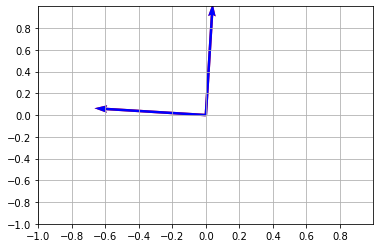

In [17]:
origin = [0], [0] # origin point
V = np.array(eigen_unit_vectors)
PC = np.array(pca.components_)
plt.quiver(*origin, V[:,0], V[:,1], color='r', scale=3)
plt.quiver(*origin, PC[:,0], PC[:,1], color='b', scale=3)
plt.xlim((-1, 1))
plt.ylim((-1, 1))
plt.xticks(np.arange(-1, 1, .2))
plt.yticks(np.arange(-1, 1, .2))
plt.grid()
plt.show()

Negated First EigenVector: False
Negated Second EigenVecor: False


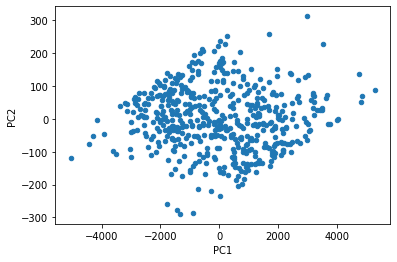

In [18]:
print(f'Negated First EigenVector: {negate_1}\nNegated Second EigenVecor: {negate_2}')
if negate_1 != negate_2:
    df_pca_scratch = df.copy()
    df_pca_scratch = np.matmul(df_pca_scratch, eigen_unit_vectors)
    df_pca_scratch.columns=['PC1', 'PC2']
else:
    df_pca_scratch = df[['Y', 'X']].copy()
    df_pca_scratch = np.matmul(df_pca_scratch, eigen_unit_vectors)
    df_pca_scratch.columns=['PC2', 'PC1']

df_pca_scratch.plot.scatter('PC1', 'PC2')

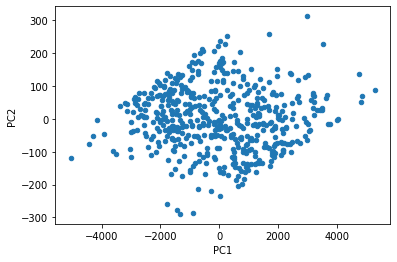

In [19]:
df_pca_skl = pd.DataFrame(pca.transform(df), columns=['PC1', 'PC2'])
# display(df_pca_skl)
df_pca_skl.plot.scatter('PC1', 'PC2')